In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### EDA
Load the data.<br>
Look at the median_house_value variable.<br>
Does it have a long tail?

In [16]:
housing = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

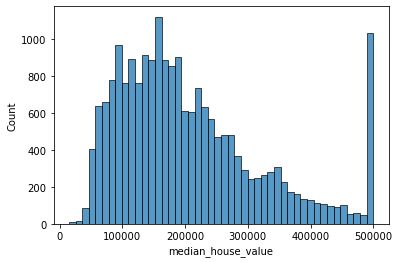

In [19]:
sns.histplot(housing['median_house_value'])

### Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [20]:
df = housing.query('ocean_proximity == ["<1H OCEAN", "INLAND"]')[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

In [21]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1
There's one feature with missing values. What is it?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


### Question 2
What's the median (50% percentile) for variable 'population'?

In [23]:
df.population.median()

1195.0

### Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.<br>
Split your data in train/val/test sets, with 60%/20%/20% distribution.<br>
Apply the log transformation to the median_house_value variable using the np.log1p() function.

### Validation Framework

In [24]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [26]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Linear Regression

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline Solution

In [31]:
df.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [32]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [34]:
def prepare_X(df, fill_value):
    df = df.copy()
    df_num = df[base]
    df_num = df_num.fillna(fill_value)
    X = df_num.values
    return X

In [35]:
X_train = prepare_X(df_train, df_train['total_bedrooms'].mean())
w_0, w = train_linear_regression(X_train, y_train)

In [36]:
w_0, w

(-9.8861332156448,
 array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

In [37]:
y_pred = w_0 + X_train.dot(w)

In [38]:
y_pred

array([11.48148474, 12.14204505, 12.45148382, ..., 12.9139426 ,
       11.93466055, 12.11281089])

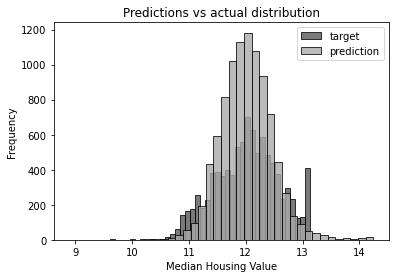

In [39]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Median Housing Value')
plt.title('Predictions vs actual distribution')

plt.show()

### Question 3
We need to deal with missing values for the column from Q1 - total_bedrooms.<br>
We have two options: fill it with 0 or with the mean of this variable.<br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?

In [40]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [41]:
X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)

In [42]:
rmse_val = rmse(y_val, y_pred)

In [43]:
## Filled with zeros
print(round(rmse_val, 2))

0.34


In [44]:
X_val = prepare_X(df_val, df_train['total_bedrooms'].mean())
y_pred = w_0 + X_val.dot(w)

In [45]:
rmse_val = rmse(y_val, y_pred)

In [46]:
## Filled with mean
print(round(rmse_val, 2))

0.34


### Question 4
Now let's train a regularized linear regression. <br>
For this question, fill the NAs with 0. <br>
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]. <br>
Use RMSE to evaluate the model on the validation dataset. <br>
Round the RMSE scores to 2 decimal digits. <br>
Which r gives the best RMSE? <br>
If there are multiple options, select the smallest r.

In [47]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [48]:
X_train = prepare_X(df_train, 0)
X_val = prepare_X(df_val, 0)

In [49]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%.2f' % (rmse_val))

0.34
0.34
0.34
0.34
0.34
0.34
0.34
0.35
0.35


### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score. <br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]. <br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution. <br>
Fill the missing values with 0 and train a model without regularization. <br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores. <br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std. <br>
Round the result to 3 decimal digits (round(std, 3)) <br>
What's the value of std? <br>

In [50]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for s in seed_list:
    np.random.seed(s)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train, fill_value=0)
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, fill_value=0)
    y_pred = w_0 + X_val.dot(w)
    
    rmse_val = rmse(y_val, y_pred)
    
    scores.append(rmse_val)
    
print(scores)
print(round(np.std(scores), 3))

[0.33773871600601446, 0.3377999353658441, 0.3384287006783112, 0.3320049468307522, 0.33944518625540115, 0.3433819705295056, 0.33853302117710987, 0.3468747697283738, 0.35127368659553965, 0.33415582665288196]
0.005


### Question 6
Split the dataset like previously, use seed 9. <br>
Combine train and validation datasets. <br>
Fill the missing values with 0 and train a model with r=0.001. <br>
What's the RMSE on the test dataset? <br>

In [51]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop=True, inplace=True)

x_full_train = prepare_X(df_full_train, 0)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(x_full_train, y_full_train, r=0.001)

X_val = prepare_X(df_val, fill_value=0)
y_pred = w_0 + X_val.dot(w)
    
rmse_val = rmse(y_val, y_pred)
print(rmse_val)

0.4137571367040584
